<a href="https://colab.research.google.com/github/Aaronphilip2003/Jovian_Final_Project/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Airbnb Destination Prediction Using Machine Learning**

Use the "Run" button to execute the code.

In [1]:
!pip install opendatasets pandas --upgrade --quiet

aaronphilip0401

In [2]:
!pip install plotly matplotlib  --upgrade --quiet

In [3]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Import all the relevant libraries**

In [4]:
import pandas as pd
import numpy as np
import opendatasets as od
import os

In [5]:
!pip install scikit-learn --upgrade --quiet

In [6]:
od.download("https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aaronphilip0401
Your Kaggle Key: ··········


100%|██████████| 64.7M/64.7M [00:01<00:00, 63.0MB/s]



Extracting archive ./airbnb-recruiting-new-user-bookings/airbnb-recruiting-new-user-bookings.zip to ./airbnb-recruiting-new-user-bookings


In [7]:
data_dir='./airbnb-recruiting-new-user-bookings'

In [8]:
os.listdir(data_dir)

['age_gender_bkts.csv.zip',
 'sample_submission_NDF.csv.zip',
 'sessions.csv.zip',
 'train_users_2.csv.zip',
 'countries.csv.zip',
 'test_users.csv.zip']

### **Read the CSV used for training the data**

In [9]:
train_df=pd.read_csv(data_dir+'/train_users_2.csv.zip')

In [10]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


### **Get information about the dataset**

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [12]:
train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## **DATA CLEANING**

In [13]:
train_df['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

**NDF stands for no data found so let us remove these rows from our dataset**

In [14]:
ndf_index=train_df[train_df['country_destination']=='NDF'].index
print(len(ndf_index))

124543


**From the above information, it is clear that we will need to drop around 124000 rows from our dataset**

In [15]:
train_df.drop(labels=ndf_index,inplace=True)

In [16]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


**After dropping those rows, we still have around 88000 rows left to train our model on**

In [17]:
train_df.country_destination.unique()

array(['US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE',
       'AU'], dtype=object)

**Now we'll clean the gender column and remove all unknown columns**

In [18]:
train_df['gender'].unique()

array(['FEMALE', '-unknown-', 'MALE', 'OTHER'], dtype=object)

In [19]:
unknown_index=train_df[train_df['gender']=='-unknown-'].index
unknown_index

Index([     4,      5,      9,     12,     17,     20,     22,     28,     29,
           30,
       ...
       213371, 213373, 213376, 213398, 213401, 213404, 213405, 213406, 213410,
       213415],
      dtype='int64', length=29018)

**We need to remove around 29000 rows of data**

In [20]:
train_df.drop(unknown_index,inplace=True)

In [21]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213412,a1rvlsdijt,2014-06-30,20140630225157,2015-01-23,FEMALE,50.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


**After cleaning we still have around 60000 rows of data to train our model on**

In [22]:
train_df.describe()

,timestamp_first_active,age,signup_flow
count,5.989000e+04,56494.000000,59890.000000
mean,2.012972e+13,48.553758,2.348472
std,9.441432e+09,153.632390,6.285540
min,2.009061e+13,2.000000,0.000000
25%,2.012093e+13,28.000000,0.000000
50%,2.013072e+13,33.000000,0.000000
75%,2.014021e+13,41.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [23]:
print(max(train_df['age']))

2014.0


**There is clearly something wrong with the dataset so we'll take only the relevant ages (5-100)**

In [24]:
age_index_100=train_df[train_df['age']>100].index
age_index_5=train_df[train_df['age']<5].index
train_df.drop(labels=age_index_100,inplace=True)
train_df.drop(labels=age_index_5,inplace=True)

In [25]:
train_df.describe()

,timestamp_first_active,age,signup_flow
count,5.906900e+04,55673.000000,59069.000000
mean,2.012972e+13,36.015573,2.355838
std,9.444645e+09,11.099460,6.294320
min,2.009061e+13,5.000000,0.000000
25%,2.012093e+13,28.000000,0.000000
50%,2.013072e+13,33.000000,0.000000
75%,2.014021e+13,41.000000,0.000000
max,2.014063e+13,100.000000,25.000000


**Now we have relevant ages 5-100**

# **Data Visualisation**

In [26]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## **Countries from where the most business is coming from**

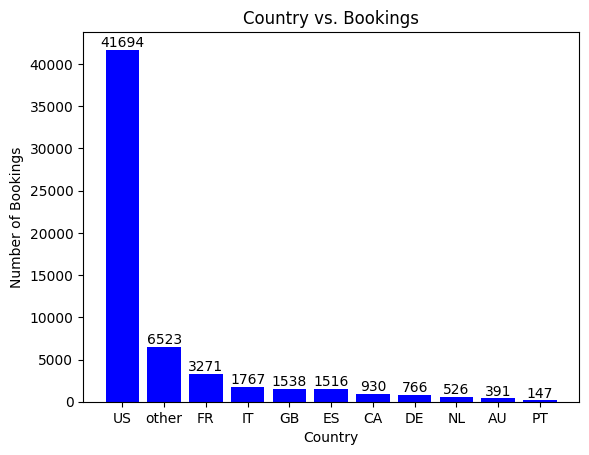

In [27]:
country = train_df.groupby('country_destination').count().sort_values(by='id', ascending=False)

plt.bar(country.index, country['id'], color='b')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Country vs. Bookings')

# Add annotations on top of each bar
for i, count in enumerate(country['id']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## **Gender vs booking**

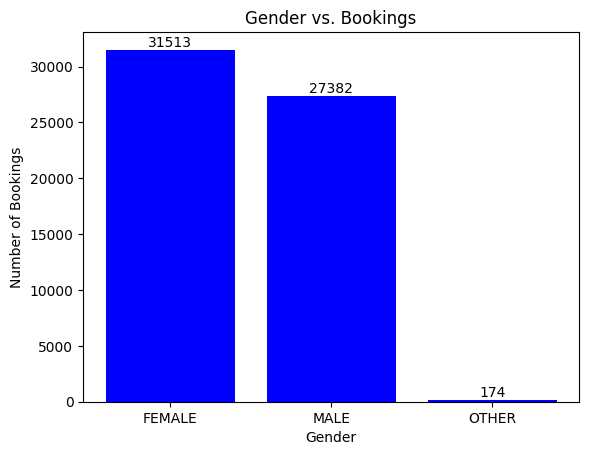

In [28]:
country = train_df.groupby('gender').count().sort_values(by='id', ascending=False)

plt.bar(country.index, country['id'], color='b')
plt.xlabel('Gender')
plt.ylabel('Number of Bookings')
plt.title('Gender vs. Bookings')

# Add annotations on top of each bar
for i, count in enumerate(country['id']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## **Browsers used**

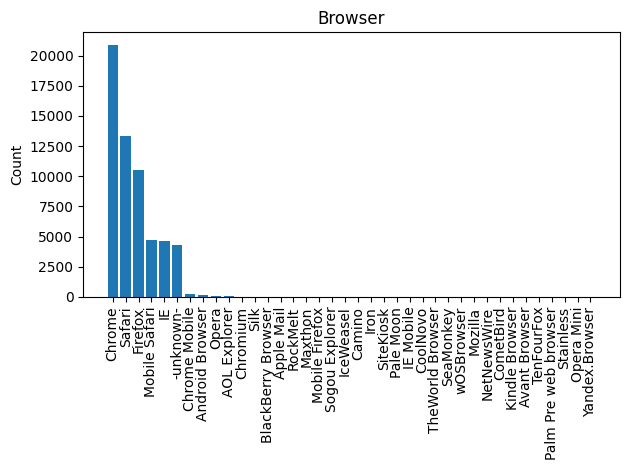

In [29]:
browser_count = train_df['first_browser'].value_counts()
fig, ax = plt.subplots()
ax.bar(browser_count.index, browser_count.values)
plt.xticks(rotation=90)

ax.set_ylabel('Count')
ax.set_title('Browser')

fig.tight_layout()
plt.show()

## **Preparing data for training the model**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_split,validation_split=train_test_split(train_df,test_size=0.15,random_state=42)

In [32]:
train_split

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
186310,deectbu5pn,2014-05-08,20140508171842,2015-03-31,FEMALE,38.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
151785,k8qh9qr0eg,2014-02-11,20140211183648,2014-03-04,MALE,27.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
15424,bbz9lzzf31,2012-01-18,20120118015128,2012-01-19,FEMALE,27.0,basic,3,en,sem-non-brand,google,tracked-other,Web,Mac Desktop,Chrome,US
186981,4x1hmm43sc,2014-05-10,20140510010034,2014-06-25,FEMALE,34.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,US
24886,lqn8t7rw9h,2012-05-21,20120521062815,2012-06-24,MALE,59.0,basic,0,en,other,other,tracked-other,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193800,7ou5t8w2co,2014-05-23,20140523051559,2014-05-30,FEMALE,27.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Firefox,FR
126666,u7qc7mvdzs,2013-11-22,20131122013823,2013-11-24,MALE,37.0,basic,25,en,direct,direct,untracked,iOS,Mac Desktop,Firefox,US
3097,cglgfwwmbu,2011-01-29,20110129234000,2011-02-03,MALE,34.0,basic,2,en,seo,google,untracked,Web,Windows Desktop,Chrome,FR
45806,3u0n9m2s4b,2012-10-23,20121023020004,2012-10-23,FEMALE,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Firefox,US


In [33]:
train_split,validation_split

(                id date_account_created  timestamp_first_active  \
 186310  deectbu5pn           2014-05-08          20140508171842   
 151785  k8qh9qr0eg           2014-02-11          20140211183648   
 15424   bbz9lzzf31           2012-01-18          20120118015128   
 186981  4x1hmm43sc           2014-05-10          20140510010034   
 24886   lqn8t7rw9h           2012-05-21          20120521062815   
 ...            ...                  ...                     ...   
 193800  7ou5t8w2co           2014-05-23          20140523051559   
 126666  u7qc7mvdzs           2013-11-22          20131122013823   
 3097    cglgfwwmbu           2011-01-29          20110129234000   
 45806   3u0n9m2s4b           2012-10-23          20121023020004   
 202181  hwuhxfhmge           2014-06-10          20140610000908   
 
        date_first_booking  gender   age signup_method  signup_flow language  \
 186310         2015-03-31  FEMALE  38.0      facebook            0       en   
 151785         2014-0

**Defining our input and target columns**

In [34]:
train_input_df=train_split[['gender','age','signup_method','signup_flow','language',
                                  'affiliate_channel','affiliate_provider','first_affiliate_tracked',
                                   'signup_app','first_device_type','first_browser']].copy()
val_input_df=validation_split[['gender','age','signup_method','signup_flow','language',
                     'affiliate_channel','affiliate_provider','first_affiliate_tracked',
                     'signup_app','first_device_type','first_browser']].copy()
target=train_split['country_destination']
val_target=validation_split['country_destination']

In [35]:
target

186310    US
151785    US
15424     US
186981    US
24886     US
          ..
193800    FR
126666    US
3097      FR
45806     US
202181    US
Name: country_destination, Length: 50208, dtype: object

### **Numerical and Categorical Columns**

In [36]:
numeric_cols=train_input_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_input_df.select_dtypes('object').columns.tolist()

In [37]:
print(numeric_cols)
print(categorical_cols)

['age', 'signup_flow']
['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']


## **IMPUTING DATA**

In [38]:
train_input_df[numeric_cols].isna().sum()

age            2921
signup_flow       0
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer=SimpleImputer(strategy='mean')

In [41]:
imputer.fit(train_df[numeric_cols])

SimpleImputer()

In [42]:
train_input_df[numeric_cols]=imputer.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols]=imputer.transform(val_input_df[numeric_cols])

In [43]:
train_input_df[numeric_cols].isna().sum()

age            0
signup_flow    0
dtype: int64

## **SCALING DATA**

In [44]:
train_input_df[numeric_cols].describe().loc[['min','max']]

,age,signup_flow
min,5.0,0.0
max,100.0,25.0


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler().fit(train_df[numeric_cols])

In [47]:
train_input_df[numeric_cols]=scaler.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols]=scaler.transform(val_input_df[numeric_cols])

In [48]:
train_input_df[numeric_cols].describe().loc[['min','max']]

,age,signup_flow
min,0.0,0.0
max,1.0,1.0


In [49]:
train_input_df

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
186310,FEMALE,0.347368,facebook,0.00,en,direct,direct,untracked,Web,Mac Desktop,Safari
151785,MALE,0.231579,basic,0.00,en,direct,direct,untracked,Web,Mac Desktop,Chrome
15424,FEMALE,0.231579,basic,0.12,en,sem-non-brand,google,tracked-other,Web,Mac Desktop,Chrome
186981,FEMALE,0.305263,basic,0.00,en,sem-brand,google,omg,Web,Mac Desktop,Chrome
24886,MALE,0.568421,basic,0.00,en,other,other,tracked-other,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...
193800,FEMALE,0.231579,facebook,0.00,en,sem-brand,google,omg,Web,Mac Desktop,Firefox
126666,MALE,0.336842,basic,1.00,en,direct,direct,untracked,iOS,Mac Desktop,Firefox
3097,MALE,0.305263,basic,0.08,en,seo,google,untracked,Web,Windows Desktop,Chrome
45806,FEMALE,0.326480,basic,0.00,en,direct,direct,omg,Web,Mac Desktop,Firefox


## **ONE HOT ENCODING OF CATEGORICAL DATA**

In [50]:
train_input_df[categorical_cols].nunique()

gender                      3
signup_method               3
language                   23
affiliate_channel           8
affiliate_provider         16
first_affiliate_tracked     7
signup_app                  4
first_device_type           9
first_browser              36
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
train_input_df[categorical_cols].nunique()

gender                      3
signup_method               3
language                   23
affiliate_channel           8
affiliate_provider         16
first_affiliate_tracked     7
signup_app                  4
first_device_type           9
first_browser              36
dtype: int64

In [53]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [54]:
encoder.fit(train_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [55]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_FEMALE', 'gender_MALE', 'gender_OTHER', 'signup_method_basic', 'signup_method_facebook', 'signup_method_google', 'language_ca', 'language_cs', 'language_da', 'language_de', 'language_el', 'language_en', 'language_es', 'language_fi', 'language_fr', 'language_hu', 'language_is', 'language_it', 'language_ja', 'language_ko', 'language_nl', 'language_no', 'language_pl', 'language_pt', 'language_ru', 'language_sv', 'language_th', 'language_tr', 'language_zh', 'affiliate_channel_api', 'affiliate_channel_content', 'affiliate_channel_direct', 'affiliate_channel_other', 'affiliate_channel_remarketing', 'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand', 'affiliate_channel_seo', 'affiliate_provider_baidu', 'affiliate_provider_bing', 'affiliate_provider_craigslist', 'affiliate_provider_direct', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook', 'affiliate_provider_facebook-open-graph', 'affiliate_provider_google', 'affiliate_provider_gsp', 'affiliate_provid

In [56]:
train_input_df[encoded_cols]=encoder.transform(train_input_df[categorical_cols])
val_input_df[encoded_cols]=encoder.transform(val_input_df[categorical_cols])

<ipython-input-56-59ac571cee37>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input_df[encoded_cols]=encoder.transform(train_input_df[categorical_cols])
<ipython-input-56-59ac571cee37>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input_df[encoded_cols]=encoder.transform(train_input_df[categorical_cols])
<ipython-input-56-59ac571cee37>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [57]:
train_input_df

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
186310,FEMALE,0.347368,facebook,0.00,en,direct,direct,untracked,Web,Mac Desktop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151785,MALE,0.231579,basic,0.00,en,direct,direct,untracked,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15424,FEMALE,0.231579,basic,0.12,en,sem-non-brand,google,tracked-other,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186981,FEMALE,0.305263,basic,0.00,en,sem-brand,google,omg,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24886,MALE,0.568421,basic,0.00,en,other,other,tracked-other,Web,Mac Desktop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193800,FEMALE,0.231579,facebook,0.00,en,sem-brand,google,omg,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126666,MALE,0.336842,basic,1.00,en,direct,direct,untracked,iOS,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3097,MALE,0.305263,basic,0.08,en,seo,google,untracked,Web,Windows Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45806,FEMALE,0.326480,basic,0.00,en,direct,direct,omg,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
val_input_df

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
60232,MALE,0.252632,facebook,0.00,en,direct,direct,linked,Web,Mac Desktop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112793,FEMALE,0.200000,facebook,0.00,en,seo,google,linked,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188226,MALE,0.557895,basic,0.00,en,sem-brand,google,omg,Web,Windows Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113895,MALE,0.389474,basic,0.00,nl,direct,direct,untracked,Web,Windows Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12978,FEMALE,0.315789,basic,0.12,en,direct,direct,untracked,Web,Windows Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44826,MALE,0.263158,basic,0.00,en,sem-brand,google,omg,Web,iPad,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175841,FEMALE,0.357895,basic,0.00,en,direct,direct,linked,Web,Mac Desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89416,FEMALE,0.210526,basic,0.00,en,direct,direct,untracked,Web,iPad,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45260,FEMALE,0.200000,facebook,0.00,en,other,other,linked,Web,Mac Desktop,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
train_inputs=train_input_df[numeric_cols+encoded_cols]
val_inputs=val_input_df[numeric_cols+encoded_cols]

## **TRAINING A LOGISTIC REGRESSION MODEL**

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model=LogisticRegression(solver='liblinear')

In [62]:
model.fit(train_inputs,target)

LogisticRegression(solver='liblinear')

In [63]:
train_preds=model.predict(train_inputs)

In [64]:
train_preds

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(target,train_preds)

0.7048876673040153

## **Decision Trees**

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
tree=DecisionTreeClassifier(random_state=42)

In [128]:
tree.fit(train_inputs,target)

DecisionTreeClassifier(random_state=42)

In [129]:
from sklearn.tree import plot_tree

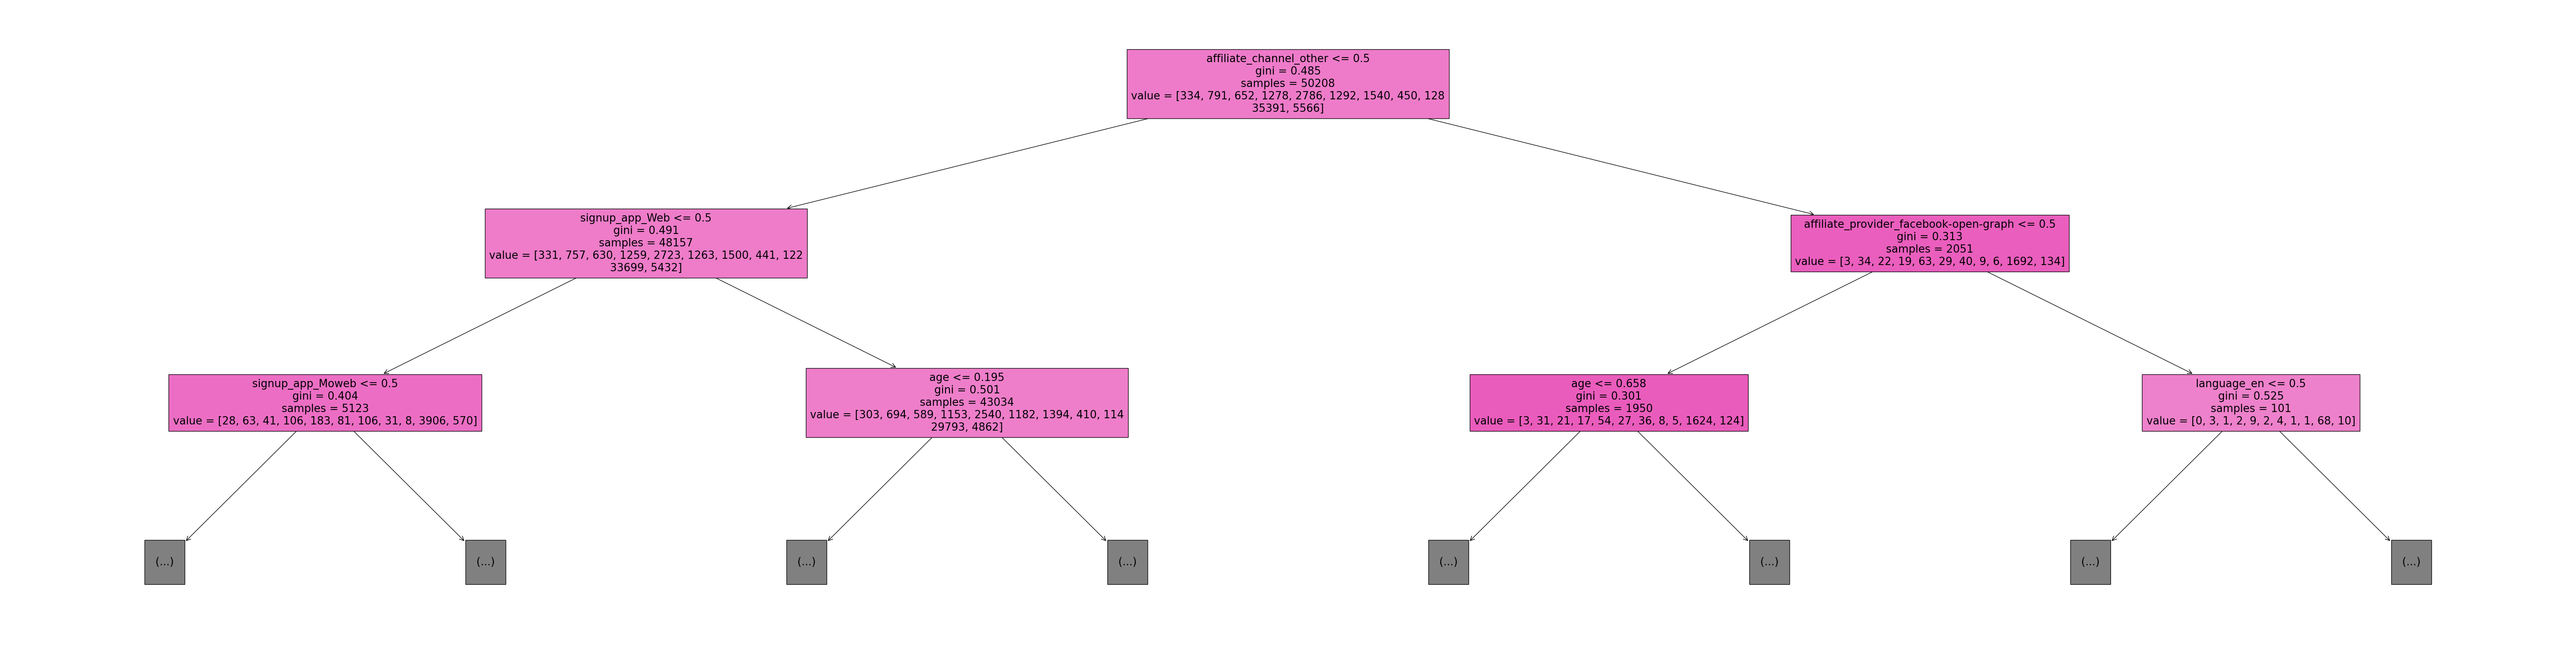

In [130]:
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

**Feature Importance**

In [131]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

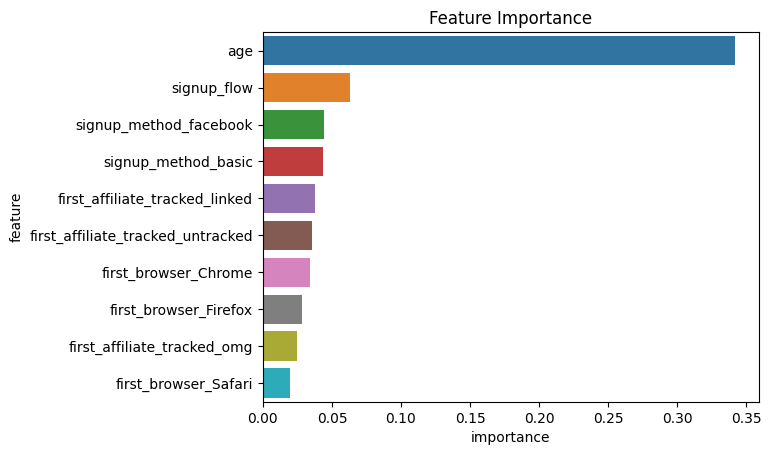

In [132]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## **MODEL EVALUATION**

In [133]:
train_tree_preds = tree.predict(train_inputs)

In [134]:
train_tree_preds

array(['US', 'US', 'US', ..., 'FR', 'US', 'US'], dtype=object)

In [135]:
accuracy_score(target,train_tree_preds)

0.7934791268323773

## **Predictions using Decision Tree Classifier**

In [76]:
val_tree_preds=tree.predict(val_inputs)

In [77]:
accuracy_score(val_tree_preds,val_target)

0.6036564721814693

## **HYPERPARAMETER TUNING**

In [112]:
tree1=DecisionTreeClassifier(random_state=42,max_depth=50,max_leaf_nodes=5,min_samples_split=10,criterion="gini")

In [113]:
tree1.fit(train_inputs,target)

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=5, min_samples_split=10,
                       random_state=42)

In [114]:
tree1.score(train_inputs,target)

0.7048876673040153

In [115]:
tree1.score(val_inputs,val_target)

0.7113192641914006

### **As we can see after hyperparameter tuning, the accuracy in prediction of the validation data set has gone by almost 11%**

## Conclusion

In our data analysis process, we followed a systematic approach to work with the dataset. Here are the key steps we performed:

1. **Data Acquisition**: We downloaded the dataset and converted the CSV file into a Pandas DataFrame.

2. **Data Cleaning**: We conducted necessary cleaning operations on the dataset to meet our specific requirements. This involved handling missing values, removing duplicates, and addressing any inconsistencies.

3. **Data Split**: We divided the dataset into a training set and a validation set. This allowed us to train our models on a subset of the data and evaluate their performance on unseen data.

4. **Data Preprocessing**: To prepare the dataset for model training, we applied various preprocessing techniques. These included imputation to handle missing values, scaling to normalize numerical features, and one-hot encoding to represent categorical variables.

5. **Model Development**: We built two models, Logistic Regression and Decision Tree, using the preprocessed dataset. These models were selected based on their suitability for the problem at hand.

6. **Hyperparameter Tuning**: We performed hyperparameter tuning for the Decision Tree model by exploring different values for the maximum depth and maximum number of leaf nodes. This process helped optimize the model's performance by finding the best combination of hyperparameters.

By following these steps, we were able to preprocess the dataset and train two models. This workflow ensured that our models were well-prepared and optimized for accurate predictions on unseen data.


## **FUTURE WORK AND IDEAS**

In order to improve the efficiency of decision tree classifiers, there are several potential future work and ideas you can consider:

1. **Feature selection and dimensionality reduction:** Explore techniques such as feature selection algorithms or dimensionality reduction methods to identify and select the most informative features, reducing computational burden.

2. **Ensemble methods:** Consider employing ensemble methods like random forests or gradient boosting to combine multiple decision trees and improve accuracy while reducing overfitting.

3. **Handling missing values:** Develop strategies to effectively handle missing values within the dataset using imputation or surrogate splits.

4. **Incremental learning and online updates:** Investigate methods for decision trees to learn incrementally or support online updates, adapting to new information without retraining the entire tree.

5. **Hybrid models:** Combine decision tree classifiers with other machine learning techniques or models to create hybrid models that leverage the strengths of both approaches.

6. **Algorithmic optimizations:** Continuously explore algorithmic optimizations, refining splitting criteria and exploring alternative tree construction algorithms.



## **References**

1. https://www.section.io/engineering-education/hyperparmeter-tuning/
2. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3.https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf